**Machine learning - Training Evaluation dan Prediction**

XGBoost Training dan Accuracy Assessement

Data sampel telah dibagi menjadi dua bagian, yaitu 80% untuk training dan 20% untuk testing. Seluruh data tersebut telah disimpan dalam format .npy, sehingga pada tahap ini kita perlu memanggilnya kembali untuk proses pelatihan model dan evaluasi akurasi.

Algoritma machine learning yang akan digunakan pada proses ini adalah Extreme Gradient Boosting (XGBoost). Library ini dirancang secara khusus untuk memudahkan pengguna dalam mengimplementasikan algoritma XGBoost yang dikenal efisien, fleksibel, dan portabel. Library xgboost mengimplementasikan algoritma pembelajaran mesin berbasis kerangka kerja Gradient Boosting.

Pada proses menentukan model yang paling optimal (Hyperparameter tuning) dilakukan dengan metode GridSearchCV. GridSearchCV adalah metode di scikit-learn untuk melakukan pencarian hyperparameter terbaik dengan cara mencoba semua kombinasi yang mungkin dari daftar hyperparameter yang telah ditentukan.

In [11]:
# Load training dan testing data yang sudah disimpan dalam format Numpy Array
import numpy as np

X_train = np.load('/content/drive/MyDrive/    Training-Tutupan-Lahan-berbasis-Machine-Learning/Miniproject/data/X_train.npy')
X_test = np.load('/content/drive/MyDrive/    Training-Tutupan-Lahan-berbasis-Machine-Learning/Miniproject/data/X_test.npy')
y_train = np.load('/content/drive/MyDrive/    Training-Tutupan-Lahan-berbasis-Machine-Learning/Miniproject/data/y_train.npy')
y_test = np.load('/content/drive/MyDrive/    Training-Tutupan-Lahan-berbasis-Machine-Learning/Miniproject/data/y_test.npy')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(400, 11) (100, 11) (400,) (100,)


In [17]:
# Import XGBoost classifier dari library xgboost
from xgboost import XGBClassifier

# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# XGBoost Classifier
init_xgb_model = XGBClassifier(random_state=69)



In [13]:
# Membuat evaluation function untuk mempermudah kedepannya
def evaluate_classification(y_true, y_pred):
    # Perhitungan overall accuracy
    OA = accuracy_score(y_true, y_pred)

    # Print Overall Accuracy
    print(f"Overall Accuracy: {OA:.4f}")

    # Menghitung classification report: precision, recall, f1-score
    report = classification_report(y_true, y_pred, digits=4)
    print(report)

    # Menghitung confusion matrix
    class_names = ['Tubuh Air', 'Vegetasi Non-Mangrove', 'Mangrove', 'Lahan Terbangun', 'Lahan Terbuka']
    cm = confusion_matrix(y_true, y_pred)

    # Visualisasi confusion matrix menggunakan seaborn heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

In [15]:
# Mendeifiniskan list beberapa parameter yang akan digunakan untuk hyperparameter tuning
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
    'n_estimators': [200, 400, 600],
    'subsample': [0.6, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_lambda': [1, 2],
    'reg_alpha': [0, 0.5]
}

In [18]:
# GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(init_xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=5)

In [19]:
## Melatih XGBoost model dengan GridSearchCV

import time

# Start the timer
start_time = time.time()

# Train XGBoost model dengan grid_search
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate and print the time taken
elapsed_time = end_time - start_time
print(f"Waktu yang dibutuhkan untuk running adalah: {elapsed_time:.3f} seconds")

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Waktu yang dibutuhkan untuk running adalah: 9966.499 seconds


In [20]:
# Print the best parameters
print("Best parameters adalah:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters adalah: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.9}
Best cross-validation accuracy: 0.9800000000000001


Overall Accuracy: 0.9700
              precision    recall  f1-score   support

           0     1.0000    0.9500    0.9744        20
           1     1.0000    1.0000    1.0000        20
           2     1.0000    1.0000    1.0000        20
           3     0.9500    0.9500    0.9500        20
           4     0.9048    0.9500    0.9268        20

    accuracy                         0.9700       100
   macro avg     0.9710    0.9700    0.9702       100
weighted avg     0.9710    0.9700    0.9702       100



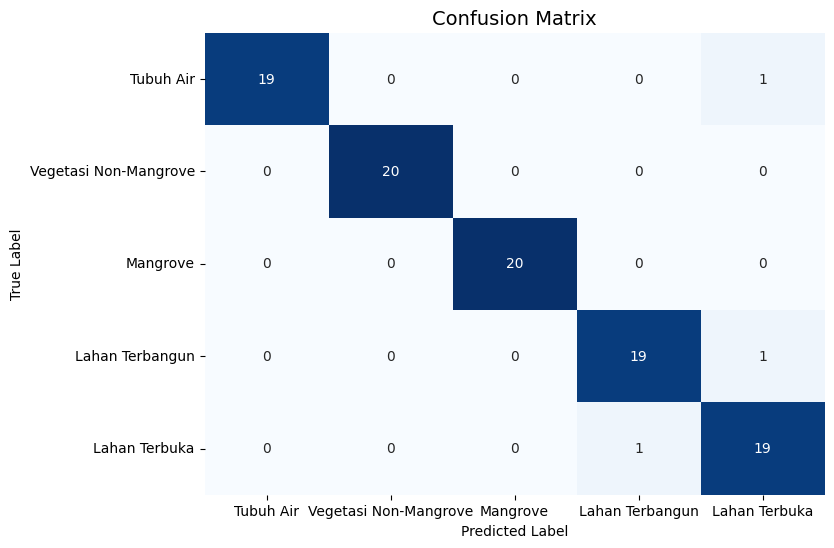

In [21]:
# Evaluation assessment

#Menerapkan best parameter xgb
best_xgb = grid_search.best_estimator_

# Menerapkan xgb_model_default untuk memprediksi kelas dari tetsing dataset
y_pred_grid = best_xgb.predict(X_test)

# Menerapkan function evaluation assessment dengan data yang sebenarnya atau y_test dan data hasil prediksi
evaluate_classification(y_test, y_pred_grid)

<Figure size 1000x800 with 0 Axes>

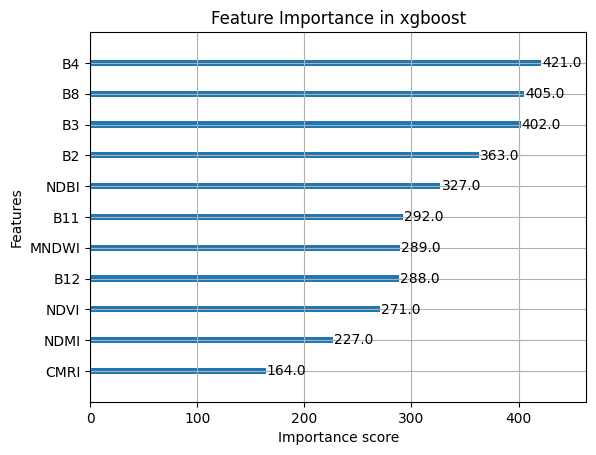

In [22]:
#Membuat feature importance

from xgboost import plot_importance
import matplotlib.pyplot as plt

#Band List
band_description = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'NDVI', 'NDBI', 'MNDWI', 'NDMI', 'CMRI']

#set band list as feature name
best_xgb.get_booster().feature_names = band_description

#Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb, importance_type='weight')
plt.title('Feature Importance in xgboost')
plt.show()

**Save Model hasil Training**

In [ ]:
import joblib

# Save the model
joblib.dump(best_xgb, '/content/drive/MyDrive/Geosoftware ID/Training - 1 November 2025/Data/Sesi 3 & 4/Data pelatihan Sesi 3 & 4/best_xgb_model.pkl')